This notebook conducted exploratory data analysis (EDA) for data from `DS_salary_cleaned.csv`, including:
- histogram and correlation heatmap for numeric columns
- barplot and boxplot for categorical columns, and pivot_table for further investigation
- boxplot for columns indicating if a specific skill is mentioned in job description
- word cloud map for job description

Interesting findings:
- avg_salary deviates from the normal distribution with positive skewness
- avg_salary has slight positive correlation with length of job description and number of competitors
- California, New York and Massachusetts have the most job opportunities.
- Among categorical values, job location, job title, seniority and skillsets have the largest impact on average 
- Top three best paid data positions are director, machine learning engineer and data scientist.
- Over half of the positions require one of the three skills: Python, Excel and SQL
- Python is more often needed in senior positions compared to generic (non-specific seniority) positions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('DS_salary_cleaned.csv')
print("Columns with numbers: ", list(df.select_dtypes(include=[np.number]).columns.values))
print("Columns with text: ", list(df.select_dtypes(exclude=[np.number]).columns.values))

Columns with numbers:  ['Rating', 'Founded', 'hourly', 'min_salary', 'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'sql_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'nlp_yn', 'rstudio_yn', 'description_length', 'num_competitor']
Columns with text:  ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'company_txt', 'job_state', 'job_simp', 'seniority']


In [3]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,age,python_yn,sql_yn,excel_yn,aws_yn,spark_yn,nlp_yn,rstudio_yn,description_length,num_competitor
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.512129,0.522911,0.237197,0.225067,0.053908,0.0,3869.545822,1.673854
std,0.801210,497.183763,0.177034,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.500190,0.499812,0.425651,0.417908,0.225989,0.0,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,10051.000000,4.000000


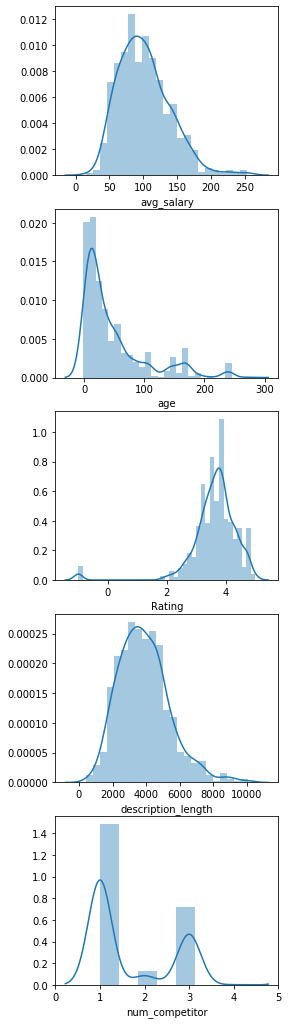

In [4]:
num_list = ['avg_salary','age','Rating','description_length','num_competitor']

f, axes = plt.subplots(5, 1, figsize=(4, 18));
for i, column_name in enumerate(num_list):
    sns.distplot(df[column_name],ax=axes[i])
    
#plt.savefig('figs/histogram.png',bbox_inches='tight')

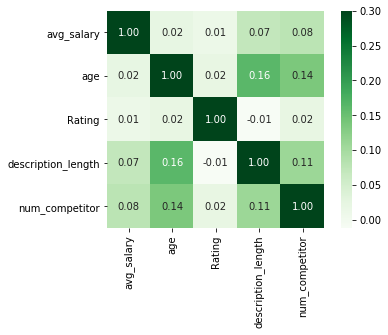

In [5]:
# correlation matrix
corrmat = df[num_list].corr()
sns.heatmap(corrmat, vmax=.3, cmap = "Greens", annot=True, fmt='.2f', square=True);

#plt.savefig('figs/heatmap.png',bbox_inches='tight')

graph for Location: total = 20


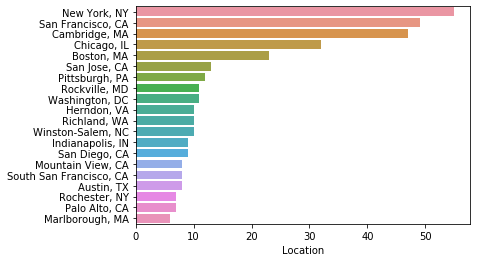

graph for Headquarters: total = 20


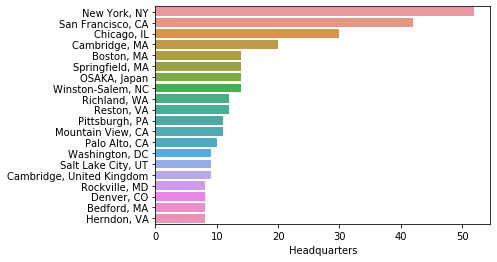

graph for Size: total = 8


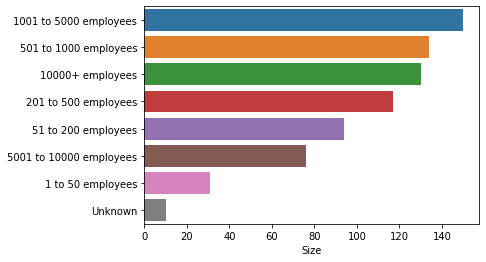

graph for Type of ownership: total = 10


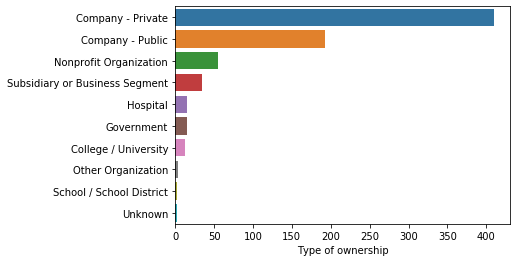

graph for Industry: total = 20


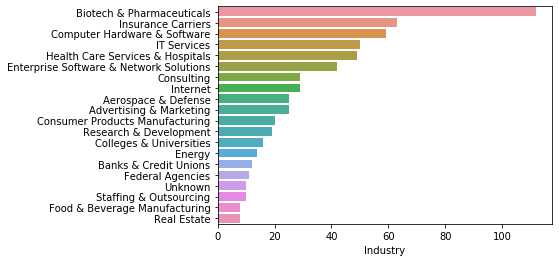

graph for Sector: total = 20


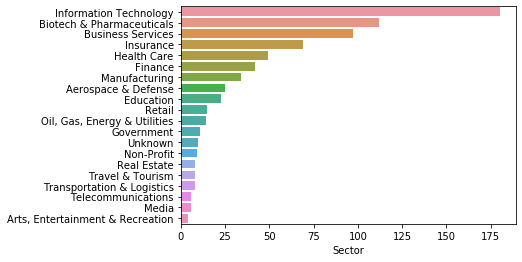

graph for Revenue: total = 14


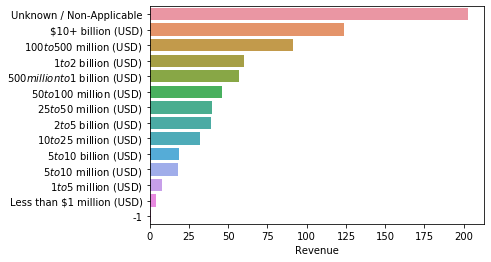

graph for company_txt: total = 20


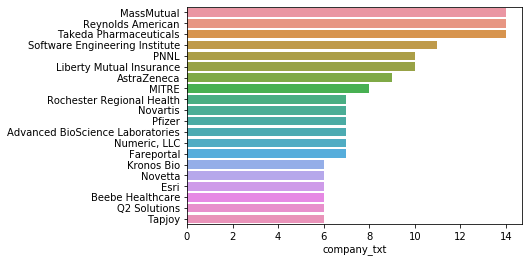

graph for job_state: total = 20


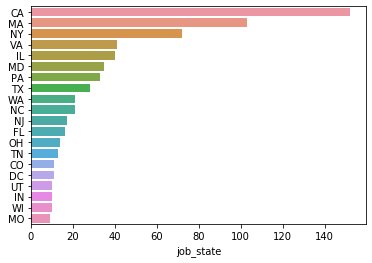

graph for same_state: total = 2


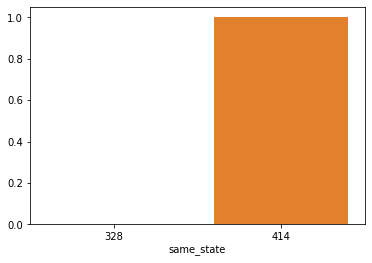

graph for job_simp: total = 7


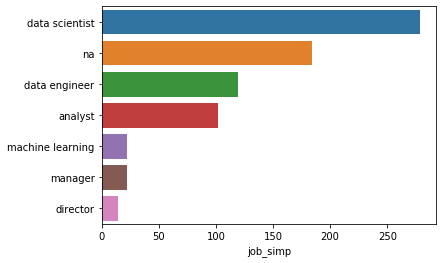

graph for seniority: total = 3


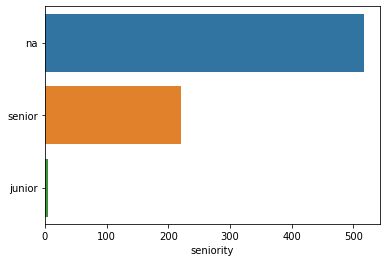

In [6]:
cat_list = ['Location', 'Headquarters', 'Size','Type of ownership', 
             'Industry', 'Sector', 'Revenue', 'company_txt', 
             'job_state','same_state', 'job_simp', 'seniority']
df_cat = df[cat_list]

for column_name in df_cat.columns:   
    if column_name in ['Location','Headquarters','company_txt','Industry','Sector','job_state']:
        cat_num = df_cat[column_name].value_counts()[:20]
    else:
        cat_num = df_cat[column_name].value_counts()
    print("graph for %s: total = %d" % (column_name, len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num.index)
    plt.show()

graph for Size


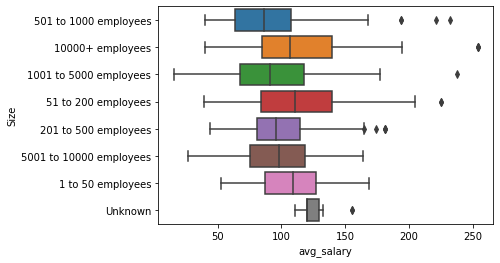

graph for Type of ownership


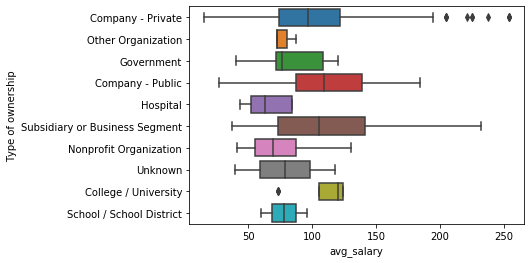

graph for Industry


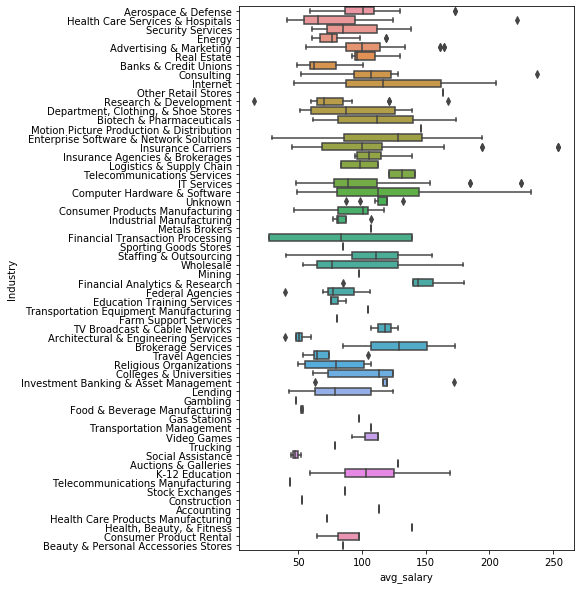

graph for Sector


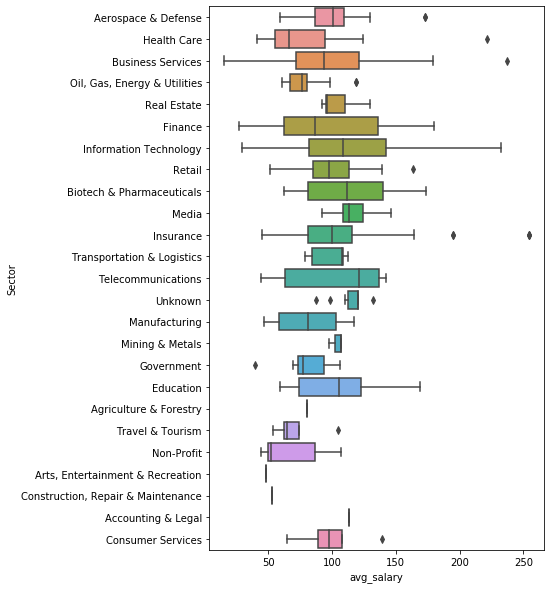

graph for Revenue


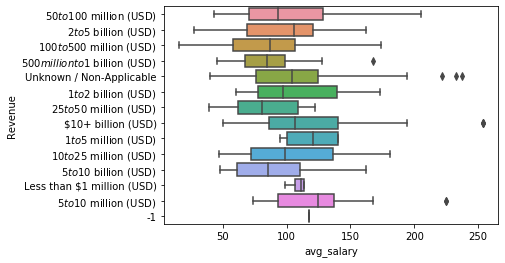

graph for job_state


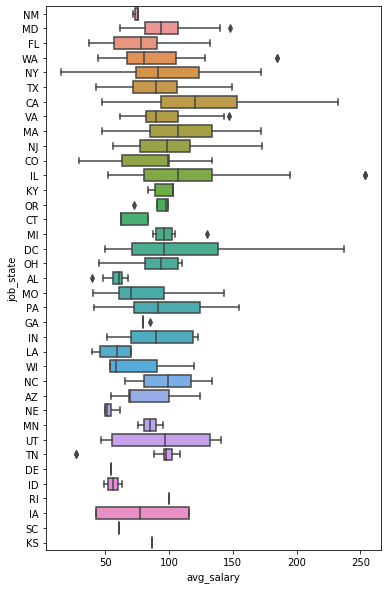

graph for job_simp


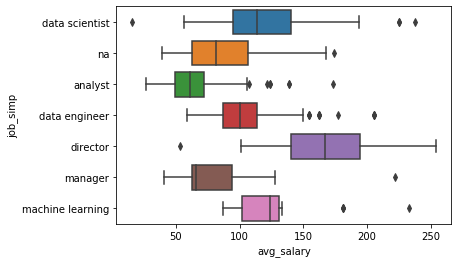

graph for seniority


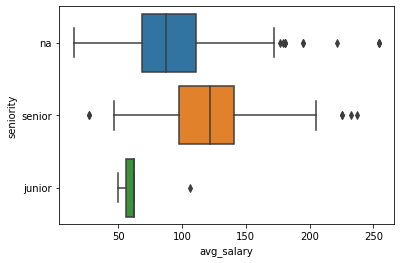

In [7]:
cat_salary_list = ['Size','Type of ownership', 'Industry', 'Sector', 
                   'Revenue','job_state','job_simp', 'seniority']
for cat in cat_salary_list:   
    print("graph for %s" % (cat))
    if cat in ['Industry','job_state','Sector']:
        fig_dims = [6, 10]
    else:
        fig_dims = [6, 4] 
    fig, ax = plt.subplots(figsize=fig_dims)
    chart = sns.boxplot(y=df[cat], x=df['avg_salary'])
    plt.show()

In [8]:
cat_salary_list = ['Size','Type of ownership', 'Industry', 'Sector', 
                   'Revenue','job_state','job_simp', 'seniority','avg_salary']
df_pivots = df[cat_salary_list]

for cat in df_pivots.columns[:-1]:  
    print(cat)
    print(pd.pivot_table(df_pivots, index = cat, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Size
                         avg_salary
Size                               
Unknown                  127.050000
10000+ employees         112.769231
51 to 200 employees      111.744681
1 to 50 employees        104.870968
201 to 500 employees     100.247863
5001 to 10000 employees   97.447368
1001 to 5000 employees    94.590000
501 to 1000 employees     91.458955
Type of ownership
                                avg_salary
Type of ownership                         
Company - Public                111.033679
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               102.060976
Government                       85.633333
Unknown                          78.500000
School / School District         77.750000
Other Organization               77.500000
Nonprofit Organization           72.936364
Hospital                         66.033333
Industry
                                          avg_salary
Industry                               

In [9]:
def view_skill_table(df):
    skill_list = ['python_yn', 'sql_yn','excel_yn','aws_yn', 'spark_yn', 'nlp_yn']
    skill_y = df[skill_list].sum()
    percent = (skill_y/(df[skill_list].shape[0]))
    skill_table = pd.concat([skill_y, percent], axis=1, keys = ['Total','Percent'])
    skill_table.sort_values(by = ['Percent'], ascending=False, inplace=True)
    return skill_table

view_skill_table(df)

,Total,Percent
python_yn,392,0.528302
excel_yn,388,0.522911
sql_yn,380,0.512129
aws_yn,176,0.237197
spark_yn,167,0.225067
nlp_yn,40,0.053908


graph for python_yn


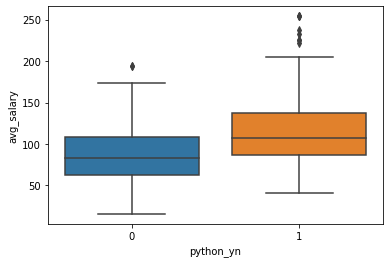

graph for sql_yn


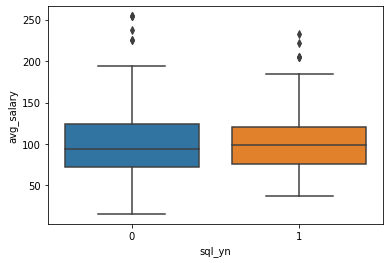

graph for excel_yn


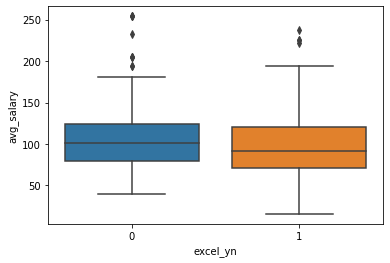

graph for aws_yn


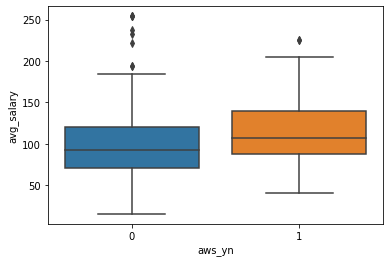

graph for spark_yn


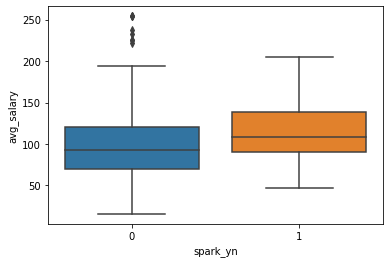

graph for nlp_yn


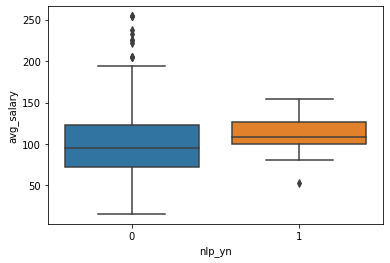

In [10]:
skill_list = ['python_yn', 'sql_yn','excel_yn','aws_yn', 'spark_yn', 'nlp_yn']

for skill in skill_list:   
    print("graph for %s" % (skill))
    chart = sns.boxplot(x=df[skill], y=df['avg_salary'])
    plt.show()

In [11]:
pd.pivot_table(df, index = 'seniority', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
seniority,,
junior,2,3
na,252,265
senior,96,124


In [12]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

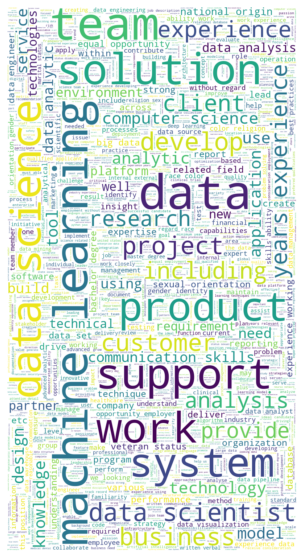

In [13]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])
wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
#plt.savefig('figs/wordcloud.png')